# Contents

## 1) Import Libraries
## 2) Import Data
## 3) Creating Regions
## 4) Loyalty by Region
## 5) Spending
## 5.1) Customer Density by Region
## 6) Department Profile
## 7) Income
## 8) Marital Loyalty
## 9) Dependants Loyalty
## 10) Loyalty by Age Group
## 11) Product Price Range
## 12) Customer Demographics

# 1) Import Libraries

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2) Import Data

In [2]:
path = r'C:\Users\bwink\Downloads\Achievement 4'

In [3]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_cust_merged.pkl'))

In [31]:
departments = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'))

In [4]:
#Replace extreme outliers with null values
df.loc[df['prices'] >100, 'prices'] = np.nan

In [5]:
df.loc[df['prices'].idxmax()]

user_id                                               6965
First                                              Brandon
Last                                                  Mata
Gender                                                Male
State                                         North Dakota
Age                                                     70
date_joined                                       1/1/2017
number_of_dependants                                     0
marital_status                            divorced/widowed
income                                              100091
product_id                                            9020
product_name              Boneless Skinless Chicken Thighs
aisle_id                                                35
department_id                                           12
prices                                                25.0
order_id                                           2224170
eval_set                                             pri

In [6]:
# Delete PII, problematic info

In [7]:
df = df.drop(columns=['First', 'Last'])

In [8]:
df.head()

,user_id,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Regularly busy,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Least busy days,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer


## Exclusion 

In [141]:
df['max_order'].head()

0    8
1    8
2    8
3    8
4    8
Name: max_order, dtype: int64

In [142]:
#subset for orders
df_max = df[df['max_order']>5]

In [143]:
df_max.shape

(28521639, 37)

In [144]:
df.shape

(30629741, 37)

In [145]:
#export
df_max.to_pickle(os.path.join(path, 'Data','Prepared Data', 'df_orders_over_5.pkl'))

# 3) Creating Regions

In [9]:
#Create Regions from States info
result = []

for value in df["State"]:
  if value == 'Maine':
    result.append("Northeast")
  elif value == 'New Hampshire':
    result.append("Northeast")
  elif value == 'Vermont':
    result.append("Northeast")
  elif value == 'Massachusetts':
    result.append("Northeast")
  elif value == 'Rhode Island':
    result.append("Northeast")
  elif value == 'Connecticut':
    result.append("Northeast")
  elif value == 'New York':
    result.append("Northeast")
  elif value == 'Pennsylvania':
    result.append("Northeast")
  elif value == 'New Jersey':
    result.append("Northeast")  
    
  elif value == 'Wisconsin':
    result.append("Midwest")
  elif value == 'Michigan':
    result.append("Midwest")
  elif value == 'Illinois':
    result.append("Midwest")
  elif value == 'Indiana':
    result.append("Midwest")
  elif value == 'Ohio':
    result.append("Midwest")
  elif value == 'North Dakota':
    result.append("Midwest")
  elif value == 'South Dakota':
    result.append("Midwest")
  elif value == 'Nebraska':
    result.append("Midwest")
  elif value == 'Kansas':
    result.append("Midwest")
  elif value == 'Minnesota':
    result.append("Midwest")
  elif value == 'Iowa':
    result.append("Midwest")
  elif value == 'Missouri':
    result.append("Midwest")  
    
  elif value == 'Idaho':
    result.append("West")
  elif value == 'Montana':
    result.append("West")
  elif value == 'Wyoming':
    result.append("West")
  elif value == 'Nevada':
    result.append("West")
  elif value == 'Utah':
    result.append("West")
  elif value == 'Colorado':
    result.append("West")
  elif value == 'Arizona':
    result.append("West")
  elif value == 'New Mexico':
    result.append("West")
  elif value == 'Alaska':
    result.append("West")
  elif value == 'Washington':
    result.append("West")
  elif value == 'Oregon':
    result.append("West")
  elif value == 'California':
    result.append("West")
  elif value == 'Hawaii':
    result.append("West")  
    
  else:
    result.append("South")

In [10]:
result

['Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 

In [13]:
df['Region'] = result

In [14]:
df['Region'].value_counts(dropna = False)

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: Region, dtype: int64

# 4) Loyalty by Region


In [20]:
#group Region and loyalty_flag
reg_loyalty_counts = df.groupby(['Region','loyalty_flag']).size().unstack(fill_value=0)

Text(0.5, 0, '')

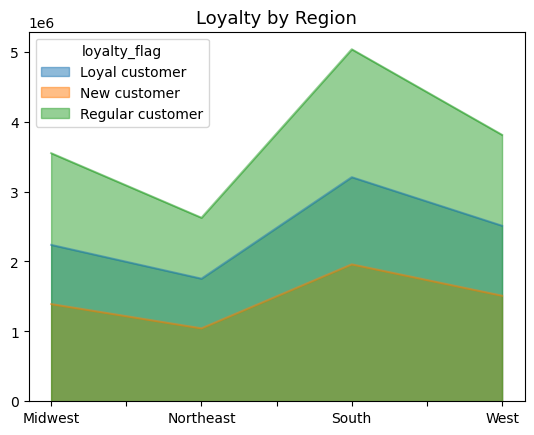

In [24]:
# Area chart for Region and loyalty_flag
area_reg_loyalty_counts = reg_loyalty_counts.plot.area(stacked=False)
plt.title('Loyalty by Region',fontsize=13)
plt.xlabel('')

In [25]:
#Save Image
area_reg_loyalty_counts.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'area_reg_loyalty_chart.png'))

# 5) Spending


In [26]:
#Group
reg_spending_counts = df.groupby(['Region','spending_flag']).size().unstack(fill_value=0)

Text(0.5, 0, '')

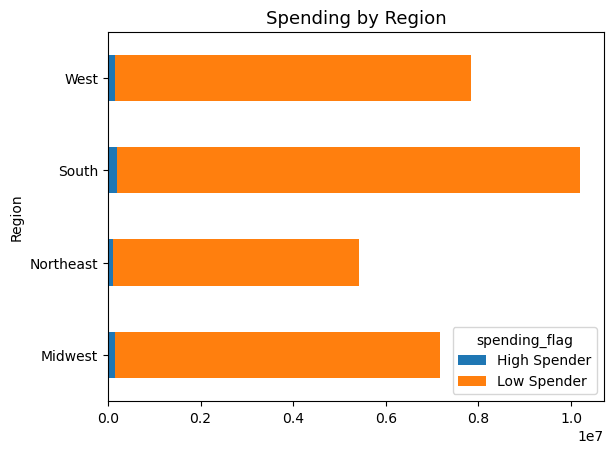

In [27]:
#bar chart
bar_reg_spend_counts = reg_spending_counts.plot.barh(stacked=True)
plt.title('Spending by Region',fontsize=13)
plt.xlabel('')

In [28]:
bar_reg_spend_counts.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_reg_spend_chart.png'))

In [134]:
# Create group for spending status and marital status
marital_spending_counts = df.groupby(['marital_status', 'spending_flag']).size().unstack(fill_value=0)

Text(0.5, 0, '')

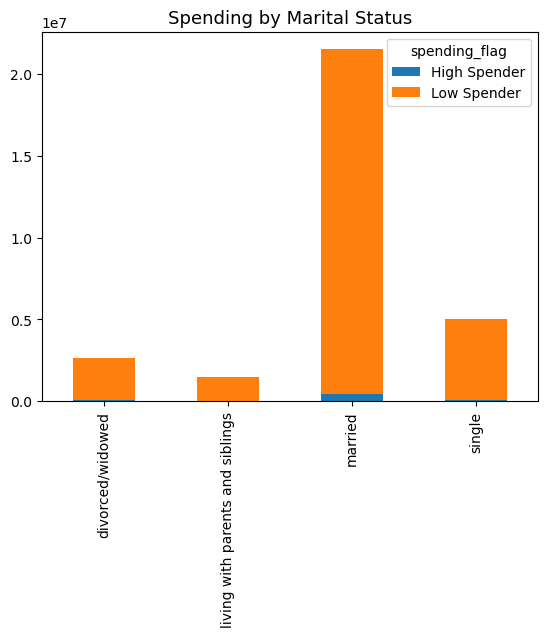

In [135]:
bar_marital_spending = marital_spending_counts.plot.bar(stacked=True)
plt.title('Spending by Marital Status', fontsize=13)
plt.xlabel('')

In [136]:
bar_marital_spending.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_marital_spending.png'))

In [137]:
# Spending by Dependants
dep_spending_counts = df.groupby(['number_of_dependants', 'spending_flag']).size().unstack(fill_value=0)

Text(0.5, 0, '')

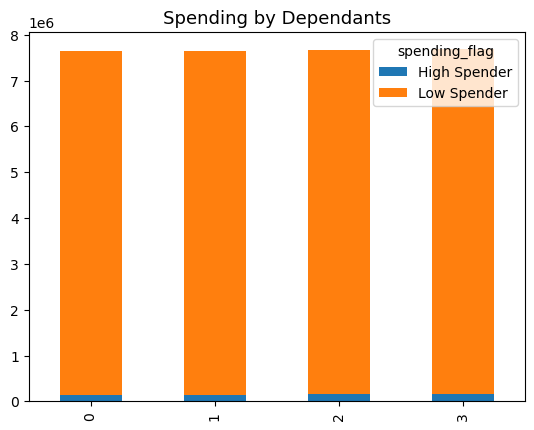

In [138]:
bar_dep_spending = dep_spending_counts.plot.bar(stacked=True)
plt.title('Spending by Dependants', fontsize=13)
plt.xlabel('')

In [139]:
bar_dep_spending.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_dependant_spending.png'))

## 5.1) Customer Density by Region

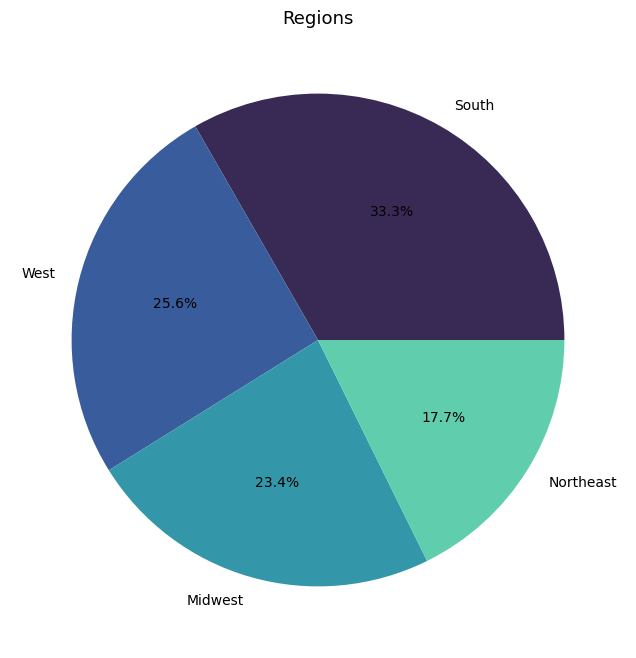

In [40]:
region_pie_chart = df['Region'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('mako', 4), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Regions',fontsize=13)
plt.show()

In [41]:
region_pie_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'region_pie_chart.png'))

# 6) Department Profile

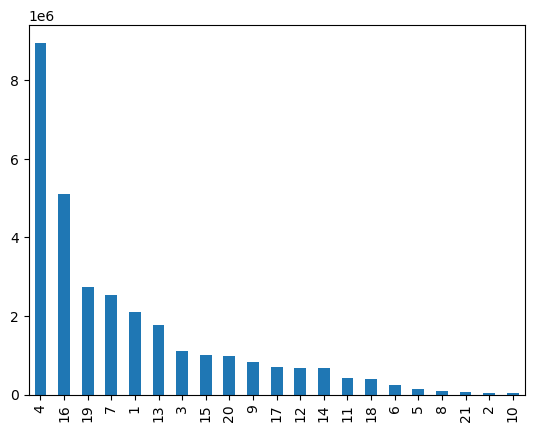

In [29]:
# Department Popularity Chart
bar_dept = df['department_id'].value_counts().plot.bar()

In [32]:
departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [33]:
departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [34]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [35]:
#merge to df by individual values in department_id column
df.loc[df['department_id'] == 1, 'Department'] = 'Frozen'
df.loc[df['department_id'] == 2, 'Department'] = 'Other'
df.loc[df['department_id'] == 3, 'Department'] = 'Bakery'
df.loc[df['department_id'] == 4, 'Department'] = 'Produce'
df.loc[df['department_id'] == 5, 'Department'] = 'Alcohol'
df.loc[df['department_id'] == 6, 'Department'] = 'International'
df.loc[df['department_id'] == 7, 'Department'] = 'Beverages'
df.loc[df['department_id'] == 8, 'Department'] = 'Pets'
df.loc[df['department_id'] == 9, 'Department'] = 'Dry Goods Pasta'
df.loc[df['department_id'] == 10, 'Department'] = 'Bulk'
df.loc[df['department_id'] == 11, 'Department'] = 'Personal Care'
df.loc[df['department_id'] == 12, 'Department'] = 'Meat/Seafood'
df.loc[df['department_id'] == 13, 'Department'] = 'Pantry'
df.loc[df['department_id'] == 14, 'Department'] = 'Breakfast'
df.loc[df['department_id'] == 15, 'Department'] = 'Canned Goods'
df.loc[df['department_id'] == 16, 'Department'] = 'Dairy/Eggs'
df.loc[df['department_id'] == 17, 'Department'] = 'Household'
df.loc[df['department_id'] == 18, 'Department'] = 'Babies'
df.loc[df['department_id'] == 19, 'Department'] = 'Snacks'
df.loc[df['department_id'] == 20, 'Department'] = 'Deli'
df.loc[df['department_id'] == 21, 'Department'] = 'Missing'

In [36]:
#check
df['Department'].value_counts(dropna = False)

Produce            8963496
Dairy/Eggs         5101185
Snacks             2730482
Beverages          2540159
Frozen             2113059
Pantry             1771171
Bakery             1108540
Canned Goods       1009660
Deli                993564
Dry Goods Pasta     819814
Household           696686
Meat/Seafood        671242
Breakfast           663250
Personal Care       421568
Babies              400378
International       254641
Alcohol             146535
Pets                 92253
Missing              65411
Other                34035
Bulk                 32612
Name: Department, dtype: int64

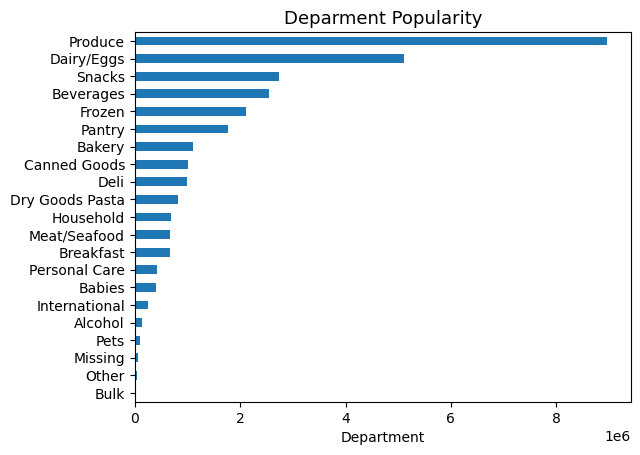

In [37]:
#bar chart for popularity of departments
bar_dept = df['Department'].value_counts().sort_values().plot.barh()
plt.ylabel('')
plt.xlabel('Department')
plt.title('Deparment Popularity',fontsize=13)
plt.show()

In [38]:
bar_dept.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_dept_pop.png'))

In [107]:
# bar chart for department by dependants
dep_dept_count = df.groupby(['Department','number_of_dependants']).size().unstack(fill_value=0)

Text(0.5, 0, 'Department')

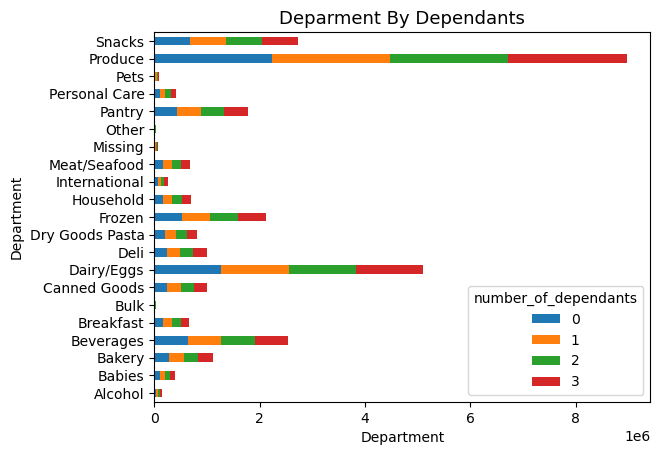

In [110]:
bar_dep_dept_count = dep_dept_count.sort_values(['Department']).plot.barh(stacked=True)
plt.title('Deparment By Dependants',fontsize=13)
plt.xlabel('Department')

In [112]:
bar_dep_dept_count.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_dept_dep.png'))

In [158]:
# Creating Popularity Chart for Departments by age group
age_department_count = df.groupby(['Department','age_group_simple']).size().unstack(fill_value=0)

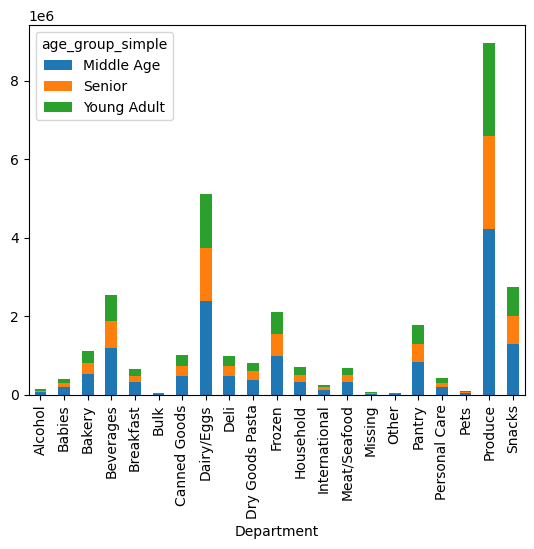

In [159]:
age_dept_bar = age_department_count.plot.bar(stacked=True)

In [160]:
age_dept_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_dept_preference.png'))

# 7) Income

In [53]:
df.loc[(df['income'] <= 68000), 'income_group'] = 'Low Income'
df.loc[(df['income'] > 68000) & (df['income'] <= 128000), 'income_group'] = 'Middle Income'
df.loc[(df['income'] > 128000), 'income_group'] = 'High Income'

In [57]:
df.head()

,user_id,Gender,State,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,Region,Department,income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,Beverages,High Income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,Beverages,High Income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,Beverages,High Income
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,Produce,High Income
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Most Orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,Midwest,Produce,High Income


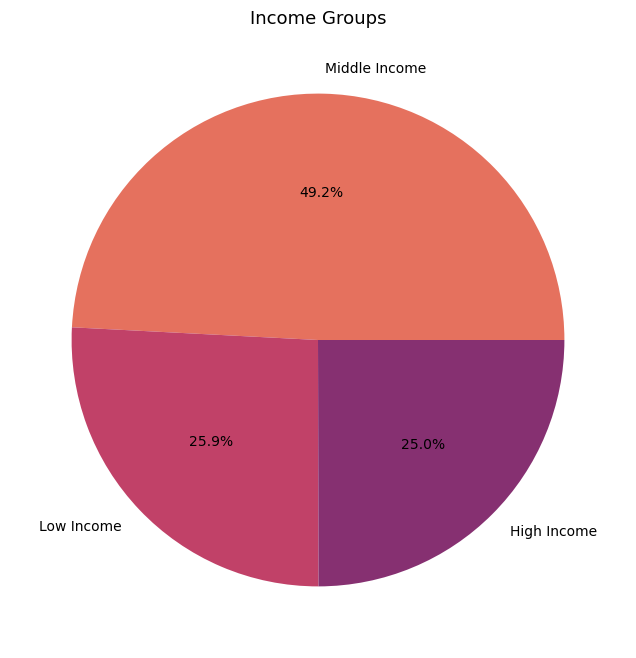

In [58]:
#create pie chart showing density of income groups in customer base
income_pie = df['income_group'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('flare', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Income Groups',fontsize=13)
plt.show()

In [59]:
income_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_density_pie.png'))

# 8) Marital Loyalty

In [62]:
#group by marital status and loyalty
family_status_loyalty = df.groupby(['loyalty_flag', 'marital_status']).size().unstack(fill_value=0)

Text(0.5, 0, '')

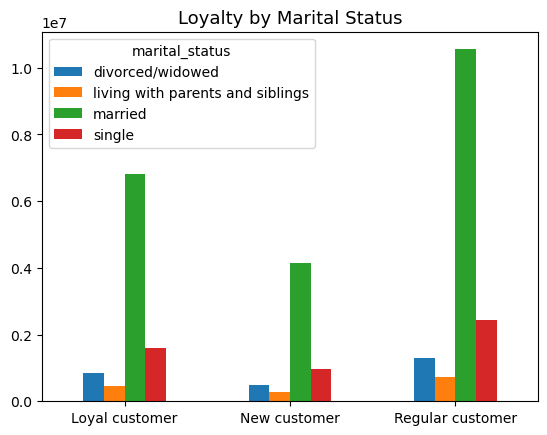

In [63]:
# Create bar chart reflecting relationship
bar_marital_status_loyalty = family_status_loyalty.plot.bar(stacked=False, rot=0)
plt.title('Loyalty by Marital Status',fontsize=13)
plt.xlabel('')

In [64]:
bar_marital_status_loyalty.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'marital_loyalty_corrected.png'))

# 9) Dependants Loyalty

In [76]:
dependant_loyalty = df.groupby(['loyalty_flag', 'number_of_dependants']).size().unstack(fill_value=0)

Text(0.5, 0, '')

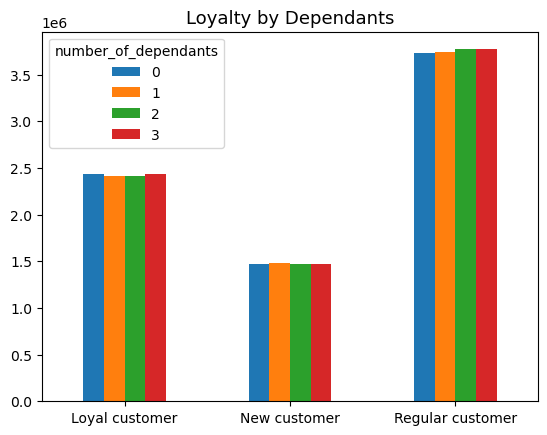

In [77]:
# Create bar chart reflecting relationship
bar_dependant_loyalty = dependant_loyalty.plot.bar(stacked=False, rot=0)
plt.title('Loyalty by Dependants',fontsize=13)
plt.xlabel('')

In [71]:
bar_dependant_loyalty.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dependant_loyalty.png'))

# 10) Loyalty by Age Group


In [81]:
#establish age groups
df.loc[df['Age'] >= 90, 'age_bracket'] = '90+'

In [98]:
df.loc[(df['Age'] <= 89) & (df['Age'] >= 80), 'age_group'] = '80-89'

In [97]:
df.loc[(df['Age'] <= 79) & (df['Age'] >= 70), 'age_group'] = '70-79'

In [96]:
df.loc[(df['Age'] <= 69) & (df['Age'] >= 60), 'age_group'] = '60-69'

In [95]:
df.loc[(df['Age'] <= 59) & (df['Age'] >= 50), 'age_group'] = '50-59'

In [94]:
df.loc[(df['Age'] <= 49) & (df['Age'] >= 40), 'age_group'] = '40-49'

In [93]:
df.loc[(df['Age'] <= 39) & (df['Age'] >= 30), 'age_group'] = '30-39'

In [92]:
df.loc[(df['Age'] <= 29) & (df['Age'] >= 20), 'age_group'] = '20-29'

In [91]:
df.loc[(df['Age'] <= 19) & (df['Age'] >= 10), 'age_group'] = '10-19'

In [100]:
#check
df['age_group'].value_counts(dropna = False)

40-49    4815900
50-59    4804320
30-39    4795448
20-29    4785372
70-79    4784783
60-69    4717936
10-19     964840
80-89     961142
Name: age_group, dtype: int64

In [101]:
#group columns
age_loyalty = df.groupby(['loyalty_flag', 'age_group']).size().unstack(fill_value=0)

Text(0.5, 0, '')

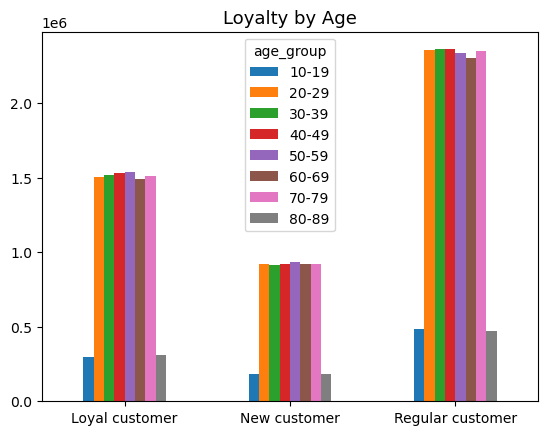

In [113]:
# Create bar chart reflecting relationship
age_loyalty_bar = age_loyalty.plot.bar(stacked=False, rot=0)
plt.title('Loyalty by Age',fontsize=13)
plt.xlabel('')

In [114]:
age_loyalty_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_loyalty_corrected.png'))

# 11) Product Price Range

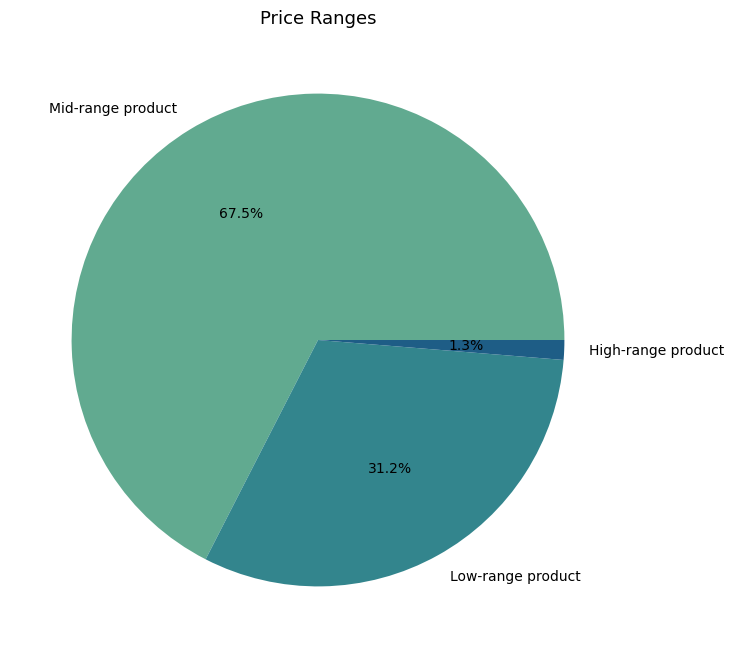

In [104]:
price_range_pie = df['price_range_loc'].value_counts().plot.pie(figsize = (8,8), 
                                                                colors = sns.color_palette('crest', 3), 
                                                                autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Price Ranges',fontsize=13)
plt.show()

In [105]:
price_range_pie.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Price_Range_Pie.png'))

# 12) Customer Demographics

In [117]:
# Creating bar chart for marital status of different income levels
marital_income_counts = df.groupby(['marital_status','income_group']).size().unstack(fill_value=0)

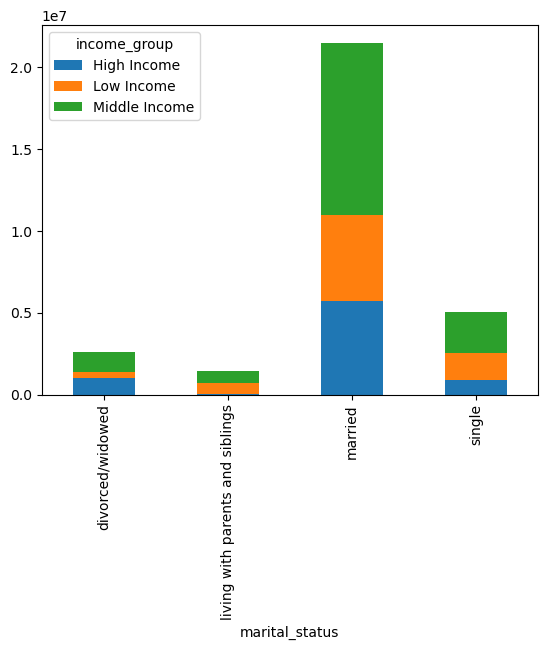

In [119]:
marital_income_counts = marital_income_counts.plot.bar(stacked=True )

In [ ]:
marital_income_counts.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'marital_income_bar.png'))

In [128]:
#setting flag for simplifying age groups
df.loc[df['Age']>= 65, 'age_group_simple'] = 'Senior'

In [129]:
df.loc[(df['Age'] < 65) & (df['Age'] >= 35), 'age_group_simple'] = 'Middle Age'

In [130]:
df.loc[df['Age'] <35, 'age_group_simple'] = 'Young Adult'

In [140]:
df.shape

(30629741, 37)

In [149]:
# create dependant flag for simplified aggregates
df.loc[df['number_of_dependants'] == 0, 'dependants'] = 'No Dependants'

In [150]:
df.loc[df['number_of_dependants'] >= 1, 'dependants'] = 'Has Dependants'

In [151]:
df['dependants'].value_counts()

Has Dependants    22980043
No Dependants      7649698
Name: dependants, dtype: int64

# 13) Aggregates

In [146]:
# age and spending 
df.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
age_group                     
10-19      7.810268  1.0  25.0
20-29      7.779803  1.0  25.0
30-39      7.791036  1.0  25.0
40-49      7.801065  1.0  25.0
50-59      7.783737  1.0  25.0
60-69      7.798931  1.0  25.0
70-79      7.790684  1.0  25.0
80-89      7.804922  1.0  25.0

In [147]:
# age simplified and spending
# age and spending aggregations
df.groupby('age_group_simple').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
age_group_simple                     
Middle Age        7.791580  1.0  25.0
Senior            7.797187  1.0  25.0
Young Adult       7.787264  1.0  25.0

In [148]:
# income and spending
df.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
High Income    7.956591  1.0  25.0
Low Income     7.308861  1.0  25.0
Middle Income  7.962334  1.0  25.0

In [152]:
# dependants and spending aggregations
df.groupby('dependants').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
dependants                         
Has Dependants  7.792702  1.0  25.0
No Dependants   7.789555  1.0  25.0

In [153]:
# marital status and prices
df.groupby('marital_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.801055  1.0  25.0
living with parents and siblings  7.806768  1.0  25.0
married                           7.791740  1.0  25.0
single                            7.783529  1.0  25.0

In [154]:
# age and frequency
df.groupby('age_group_simple').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
age_group_simple                                  
Middle Age                    11.114926  0.0  30.0
Senior                        11.080959  0.0  30.0
Young Adult                   11.132158  0.0  30.0

In [155]:
# income and frequency
df.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
income_group                                   
High Income                11.026326  0.0  30.0
Low Income                 11.318095  0.0  30.0
Middle Income              11.044724  0.0  30.0

In [156]:
# dependants and frequency
df.groupby('dependants').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
dependants                                      
Has Dependants              11.119048  0.0  30.0
No Dependants               11.084925  0.0  30.0

In [157]:
# marital status and frequency
df.groupby('marital_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                   mean  min   max
marital_status                                                    
divorced/widowed                              11.027251  0.0  30.0
living with parents and siblings              11.047268  0.0  30.0
married                                       11.123960  0.0  30.0
single                                        11.115149  0.0  30.0